# Figures for Research Rotation Report 
## Convolutional Neural Network for Predicting RNA Secondary Structure
**Harrison LaBollita**
In this notebook, I have th code necessary to produce the figures in my research rotation report.

In [21]:
import torch
from torch.autograd import Variable
import numpy as np
import time
import model as rnaConvNet
import load_data as load
import plot as p
import accuracy as acc
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman, Times']})

In [2]:
#sources = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/sequences.txt'
#targets = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/dotbrackets.txt'

sources = '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/code/RNA_data_set.csv'
targets = 0

def train(convNet, batch_size, Epochs, learningRate, momentum):
    print('-'*30)
    print("  HYPERPARAMETERS  ")
    print('-'*30)
    print("Batch size = ", batch_size)
    print("Learning rate = ", learningRate)
    print("Momentum = ", momentum)
    print("Epochs = ", Epochs)
    print('-'*30)

    # function to call in data
    train_loader, test_loader = load.getTrainingSets(sources, targets, max_seq_length, batch_size)

    # Create loss and optimizer functions
    loss = rnaConvNet.Loss()
    optimizer = rnaConvNet.Optimizer(convNet, learningRate, momentum)
    trainingStartTime = time.time()

    # Start training
    #totalStep = len(train_loader)
    train_acc = []
    val_acc = []
    losses = []
    val_losses = []

    for epoch in range(Epochs):

        runningLoss = 0.0
        totalTrainLoss = 0.0

        startTime = time.time()

        for i, (src, tgt) in enumerate(train_loader):
            temp_acc_list = []

            src = src.view(batch_size, 1, max_seq_length, max_seq_length)

            src = Variable(src)
            tgt = Variable(tgt)

            outputs = convNet(src)

            loss_size = loss(outputs, tgt)

            # Delete the target and source variables to free up memory
            del src

            optimizer.zero_grad()
            loss_size.backward()
            optimizer.step()

            temp_acc_list.append(np.mean(acc.compute_acc(outputs, tgt)))

            del tgt
            del outputs

        train_acc.append(np.mean(temp_acc_list))

        for i, (pred, real) in enumerate(test_loader):

            temp_val_acc = []

            pred = Variable(pred)
            real = Variable(real)

            pred = pred.view(-1, 1, max_seq_length, max_seq_length)

            val_outputs = convNet(pred)
            val_loss_size = loss(val_outputs, real)

            temp_val_acc.append(np.mean(acc.compute_acc(val_outputs, real)))

            del pred
            del real

        val_acc.append(np.mean(temp_val_acc))
        val_losses.append(float(val_loss_size))
        losses.append(float(loss_size.item()))
        print('Epoch: {}/{}, Accuracy: {:0.2f}%, Loss: {:.4f}, Val loss: {:0.4f}, Val Acc: {:0.2f}%, Time: {:0.2f}s'.format(epoch + 1, Epochs, train_acc[epoch]*100, float(loss_size.item()), float(val_loss_size.item()), val_acc[epoch]*100, time.time() - startTime))

    history = [train_acc, val_acc, losses, val_losses]
    return history

In [9]:
max_seq_length = 30
num_classes = 3 
model = rnaConvNet.rnaConvNet(max_seq_length, num_classes)

batch_size = 100
epochs = 100
learning_rate = 0.001
momentum = 0.9

history = train(model, batch_size, epochs, learning_rate, momentum)

------------------------------
  HYPERPARAMETERS  
------------------------------
Batch size =  100
Learning rate =  0.001
Momentum =  0.9
Epochs =  100
------------------------------
Epoch: 1/100, Accuracy: 73.27%, Loss: 0.4973, Val loss: 0.4728, Val Acc: 74.19%, Time: 51.38s
Epoch: 2/100, Accuracy: 75.84%, Loss: 0.4557, Val loss: 0.4580, Val Acc: 76.21%, Time: 51.02s
Epoch: 3/100, Accuracy: 77.96%, Loss: 0.4382, Val loss: 0.4435, Val Acc: 77.24%, Time: 186.01s
Epoch: 4/100, Accuracy: 76.49%, Loss: 0.4559, Val loss: 0.4373, Val Acc: 76.88%, Time: 105.89s
Epoch: 5/100, Accuracy: 77.56%, Loss: 0.4312, Val loss: 0.4362, Val Acc: 77.67%, Time: 55.01s
Epoch: 6/100, Accuracy: 79.53%, Loss: 0.4184, Val loss: 0.4398, Val Acc: 78.02%, Time: 53.31s
Epoch: 7/100, Accuracy: 79.73%, Loss: 0.4187, Val loss: 0.4255, Val Acc: 78.90%, Time: 53.53s
Epoch: 8/100, Accuracy: 80.00%, Loss: 0.4153, Val loss: 0.4209, Val Acc: 79.21%, Time: 52.51s
Epoch: 9/100, Accuracy: 80.56%, Loss: 0.4091, Val loss: 0.4059

Epoch: 86/100, Accuracy: 83.47%, Loss: 0.3589, Val loss: 0.3588, Val Acc: 82.94%, Time: 74.96s
Epoch: 87/100, Accuracy: 82.96%, Loss: 0.3512, Val loss: 0.3436, Val Acc: 83.97%, Time: 75.31s
Epoch: 88/100, Accuracy: 83.78%, Loss: 0.3463, Val loss: 0.3498, Val Acc: 83.46%, Time: 75.51s
Epoch: 89/100, Accuracy: 83.82%, Loss: 0.3440, Val loss: 0.3446, Val Acc: 84.29%, Time: 77.64s
Epoch: 90/100, Accuracy: 83.87%, Loss: 0.3457, Val loss: 0.3686, Val Acc: 83.14%, Time: 675.41s
Epoch: 91/100, Accuracy: 82.40%, Loss: 0.3716, Val loss: 0.3679, Val Acc: 82.81%, Time: 59.39s
Epoch: 92/100, Accuracy: 83.84%, Loss: 0.3426, Val loss: 0.3352, Val Acc: 84.06%, Time: 56.89s
Epoch: 93/100, Accuracy: 82.84%, Loss: 0.3607, Val loss: 0.3577, Val Acc: 83.34%, Time: 56.63s
Epoch: 94/100, Accuracy: 84.16%, Loss: 0.3440, Val loss: 0.3659, Val Acc: 82.99%, Time: 56.85s
Epoch: 95/100, Accuracy: 81.96%, Loss: 0.3763, Val loss: 0.3472, Val Acc: 84.78%, Time: 52.91s
Epoch: 96/100, Accuracy: 83.78%, Loss: 0.3542, Va

In [97]:
def plotmodel_loss(epochs, loss, val_loss, title):
    epo = np.linspace(1, epochs, epochs)
    plt.figure(figsize = (8,5))
    plt.title(r'{\bf %s}' %(title), fontsize = 17)
    plt.grid(True, linestyle = ':', linewidth = 1)
    plt.xlim([1,100])
    plt.xlabel(r'{\bf Epochs}', fontsize = 15)
    plt.ylabel(r'{\bf Loss}', fontsize = 15)
    plt.plot(epo, loss, 'k-', linewidth = 1.5, label = r'{\bf Loss}')
    plt.plot(epo, val_loss, 'k--', linewidth = 1.5, alpha = 0.5, label = r'{\bf Val. Loss}')
    plt.legend(loc='best')
    plt.savefig('loss.eps', format = 'eps')
    plt.show()

def plotmodel_acc(epochs, acc, val_acc, title):
    epo = np.linspace(1, epochs,epochs)
    plt.figure(figsize = (8,5))
    plt.title(r'{\bf %s}' %(title), fontsize = 17)
    plt.grid(True, linestyle = ':', linewidth = 1)
    plt.xlim([1,100])
    plt.xlabel(r'{\bf Epochs}', fontsize = 15)
    plt.ylabel(r'{\bf Accuracy}', fontsize = 15)
    plt.plot(epo, acc, 'k-', linewidth = 1.5, label = 'Training Accuracy')
    plt.plot(epo, val_acc, 'k--', linewidth = 1.5, alpha = 0.5, label = 'Val. Accuracy')
    plt.legend(loc='best')
    plt.savefig('acc.eps', format = 'eps')
    plt.show()

#torch.save(model.state_dict(), '/Users/harrisonlabollita/Library/Mobile Documents/com~apple~CloudDocs/Arizona State University/Sulc group/src/explore/cnn code/cnn_trained_model.pt')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


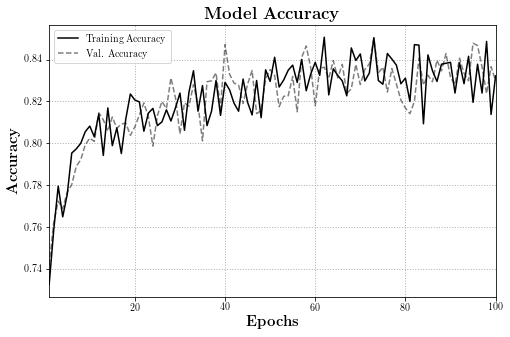

In [98]:
plotmodel_acc(epochs, history[0], history[1], 'Model Accuracy')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


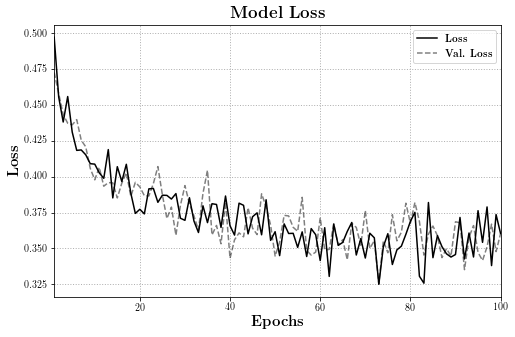

In [99]:
plotmodel_loss(epochs, history[2], history[3], 'Model Loss')

In [100]:
f = open('history.txt')
f.

[[0.7326666666666667,
  0.7584444444444445,
  0.7795555555555554,
  0.7648888888888888,
  0.7755555555555553,
  0.7953333333333332,
  0.7973333333333333,
  0.8,
  0.8055555555555555,
  0.8082222222222221,
  0.8031111111111112,
  0.814,
  0.7942222222222222,
  0.816888888888889,
  0.7988888888888888,
  0.8073333333333333,
  0.7951111111111112,
  0.8117777777777779,
  0.8235555555555556,
  0.8206666666666667,
  0.8197777777777779,
  0.8057777777777778,
  0.8144444444444444,
  0.8166666666666668,
  0.8084444444444446,
  0.8102222222222221,
  0.816,
  0.8106666666666666,
  0.816888888888889,
  0.824,
  0.8062222222222222,
  0.8244444444444444,
  0.8346666666666666,
  0.8153333333333334,
  0.8275555555555556,
  0.8084444444444445,
  0.8153333333333331,
  0.83,
  0.8133333333333332,
  0.8291111111111111,
  0.8255555555555554,
  0.8191111111111111,
  0.8153333333333331,
  0.8306666666666667,
  0.8195555555555554,
  0.8135555555555554,
  0.83,
  0.8122222222222223,
  0.835111111111111,
  0.829